In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_excel('co2_emission_data_test.xlsx')

**Exploration**

In [3]:
raw_data.tail(4)

,Limestone,Shale,Iron ore,CaO,SiO2,Al2O3,Fe2O3,LSF,AM,SM,Emission factor,Co2
69,84.41,14.75,2.85,68.44,20.910,6.63,4.590,98.68,1.44,1.860,0.54,54.800
70,86.06,15.04,2.90,69.78,21.320,6.76,4.680,98.68,1.44,1.860,0.55,56.970
71,86.89,15.18,2.93,70.46,21.530,6.83,4.730,98.66,1.44,1.860,0.55,57.750
72,83.16,14.53,2.80,67.44,20.602,6.53,4.523,98.68,1.44,1.863,0.53,53.201


In [4]:
raw_data.isnull().sum()

Limestone          2
Shale              0
Iron ore           0
CaO                1
SiO2               1
Al2O3              1
Fe2O3              0
LSF                1
AM                 0
SM                 0
Emission factor    2
Co2                2
dtype: int64

In [5]:
raw_data['Limestone'] = raw_data['Limestone'].fillna(raw_data['Limestone'].mean())
raw_data['Shale'] = raw_data['Shale'].fillna(raw_data['Shale'].mean())
raw_data['Iron ore'] = raw_data['Iron ore'].fillna(raw_data['Iron ore'].mean())
raw_data['CaO'] = raw_data['CaO'].fillna(raw_data['CaO'].mean())
raw_data['SiO2'] = raw_data['SiO2'].fillna(raw_data['SiO2'].mean())
raw_data['Al2O3'] = raw_data['Al2O3'].fillna(raw_data['Al2O3'].mean())
raw_data['Fe2O3'] = raw_data['Fe2O3'].fillna(raw_data['Fe2O3'].mean())
raw_data['LSF'] = raw_data['LSF'].fillna(raw_data['LSF'].mean())
raw_data['AM'] = raw_data['AM'].fillna(raw_data['AM'].mean())
raw_data['SM'] = raw_data['SM'].fillna(raw_data['SM'].mean())
raw_data['Emission factor'] = raw_data['Emission factor'].fillna(raw_data['Emission factor'].mean())
raw_data['Co2'] = raw_data['Co2'].fillna(raw_data['Co2'].mean())

In [6]:
raw_data.head()

,Limestone,Shale,Iron ore,CaO,SiO2,Al2O3,Fe2O3,LSF,AM,SM,Emission factor,Co2
0,33.10000,5.784,1.116,25.60,8.800000,2.00,1.200,92.2,1.7,2.75,0.502400,20.096000
1,165.50000,28.920,5.580,129.00,43.600000,11.00,5.000,93.3,2.2,2.73,0.506300,101.260000
2,859.46148,27.500,5.300,121.20,230.621364,8.60,5.320,84.9,1.6,3.30,0.500830,521.746125
3,278.73000,46.000,9.234,224.01,77.980000,11.60,9.580,94.0,1.2,3.70,0.514175,175.847850
4,216.79000,35.777,6.384,179.55,56.924000,17.29,6.118,97.7,2.8,2.43,0.502359,140.946750


In [7]:
raw_data.describe()

,Limestone,Shale,Iron ore,CaO,SiO2,Al2O3,Fe2O3,LSF,AM,SM,Emission factor,Co2
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,859.461480,147.074326,27.958792,657.873347,230.621364,52.989607,27.709904,92.207819,1.787836,2.673041,0.502359,521.746125
std,880.486907,155.618018,30.007533,683.123000,241.581061,57.638216,27.608107,6.967345,0.369530,0.652581,0.022023,532.939906
min,28.273000,4.473000,0.973000,22.680000,7.945000,2.000000,1.200000,65.790000,1.200000,1.770000,0.421000,17.803800
25%,86.890000,15.180000,2.850000,69.780000,21.320000,6.570000,4.523000,88.300000,1.440000,2.090000,0.490000,56.970000
50%,540.082500,61.875000,12.060000,346.500000,120.288000,27.594000,16.200000,92.600000,1.790000,2.720000,0.502400,334.975200
75%,1478.438000,260.280000,47.430000,1168.500000,384.375000,93.600000,46.360000,97.700000,2.066000,3.060000,0.514000,917.700000
max,2896.250000,506.100000,97.650000,2298.400000,850.500000,227.500000,91.000000,117.680000,2.800000,4.320000,0.550000,1802.000000


In [8]:
raw_data.sem(axis=0, skipna=False)

Limestone          103.053198
Shale               18.213711
Iron ore             3.512116
CaO                 79.953500
SiO2                28.274925
Al2O3                6.746043
Fe2O3                3.231284
LSF                  0.815466
AM                   0.043250
SM                   0.076379
Emission factor      0.002578
Co2                 62.375898
dtype: float64

In [9]:
raw_data.isnull().sum()

Limestone          0
Shale              0
Iron ore           0
CaO                0
SiO2               0
Al2O3              0
Fe2O3              0
LSF                0
AM                 0
SM                 0
Emission factor    0
Co2                0
dtype: int64

In [10]:
import seaborn as sns

In [11]:
data_correlation = raw_data.corr(method = 'kendall')
print(data_correlation)

                 Limestone     Shale  Iron ore       CaO      SiO2     Al2O3  \
Limestone         1.000000  0.960228  0.945164  0.972973  0.962512  0.891300   
Shale             0.960228  1.000000  0.966686  0.973168  0.955860  0.892273   
Iron ore          0.945164  0.966686  1.000000  0.948210  0.941557  0.883260   
CaO               0.972973  0.973168  0.948210  1.000000  0.948049  0.904626   
SiO2              0.962512  0.955860  0.941557  0.948049  1.000000  0.877046   
Al2O3             0.891300  0.892273  0.883260  0.904626  0.877046  1.000000   
Fe2O3             0.875309  0.905976  0.893925  0.891300  0.890750  0.888804   
LSF              -0.183764 -0.168068 -0.154406 -0.165426 -0.197098 -0.169661   
AM                0.440099  0.424064  0.416910  0.435818  0.424842  0.427728   
SM                0.310703  0.297941  0.293875  0.300308  0.315648  0.214492   
Emission factor  -0.089549 -0.082200 -0.079158 -0.080286 -0.078341 -0.049802   
Co2               0.954701  0.954139  0.

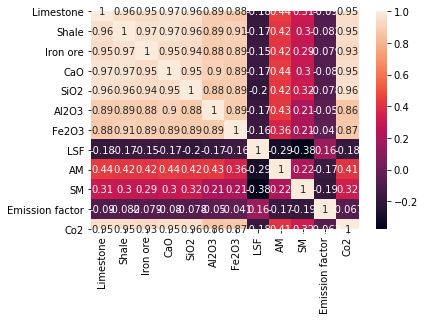

In [12]:
sns.heatmap(data_correlation, annot=True)

**Preprocessing**

In [13]:
features = raw_data.columns.values
features

array(['Limestone', 'Shale', 'Iron ore', 'CaO', 'SiO2', 'Al2O3', 'Fe2O3',
       'LSF', 'AM', 'SM', 'Emission factor', 'Co2'], dtype=object)

In [14]:
raw_data.drop(['LSF', 'AM', 'SM', 'Emission factor'], axis=1, inplace=True)

In [15]:
raw_data.head()

,Limestone,Shale,Iron ore,CaO,SiO2,Al2O3,Fe2O3,Co2
0,33.10000,5.784,1.116,25.60,8.800000,2.00,1.200,20.096000
1,165.50000,28.920,5.580,129.00,43.600000,11.00,5.000,101.260000
2,859.46148,27.500,5.300,121.20,230.621364,8.60,5.320,521.746125
3,278.73000,46.000,9.234,224.01,77.980000,11.60,9.580,175.847850
4,216.79000,35.777,6.384,179.55,56.924000,17.29,6.118,140.946750


In [16]:
from sklearn.model_selection import train_test_split
X = raw_data.drop(['Co2'], axis=1)
y = raw_data['Co2']
print(len(X), len(y))

73 73


In [17]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [19]:
from sklearn.feature_selection import RFE
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, 8))}]

# specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

In [20]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033492,0.021280,0.012882,0.015777,2,{'n_features_to_select': 2},0.917891,0.941030,0.989239,0.993380,...,0.967457,0.031943,1,0.984383,0.998082,0.995241,0.994321,0.990278,0.992461,0.004750
1,0.018232,0.003198,0.003130,0.006259,3,{'n_features_to_select': 3},0.739803,0.807324,0.987250,0.993734,...,0.903205,0.108007,2,0.999341,0.999558,0.995866,0.994737,0.994914,0.996883,0.002131
2,0.016933,0.002609,0.000000,0.000000,4,{'n_features_to_select': 4},0.709101,0.774387,0.976604,0.995176,...,0.889628,0.122666,3,0.999871,0.999905,0.996408,0.995188,0.995892,0.997453,0.002026
3,0.011406,0.006083,0.008270,0.007049,5,{'n_features_to_select': 5},0.708315,0.781287,0.970119,0.988687,...,0.888206,0.119584,6,0.999886,0.999906,0.996416,0.996569,0.996252,0.997806,0.001710
4,0.008225,0.003230,0.003028,0.003744,6,{'n_features_to_select': 6},0.714509,0.778166,0.971083,0.989263,...,0.888921,0.118359,5,0.999887,0.999910,0.996644,0.996585,0.996664,0.997938,0.001601
5,0.004594,0.000488,0.002395,0.000487,7,{'n_features_to_select': 7},0.714021,0.777215,0.975189,0.989819,...,0.889627,0.119408,4,0.999887,0.999910,0.996697,0.996608,0.996795,0.997979,0.001568


C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


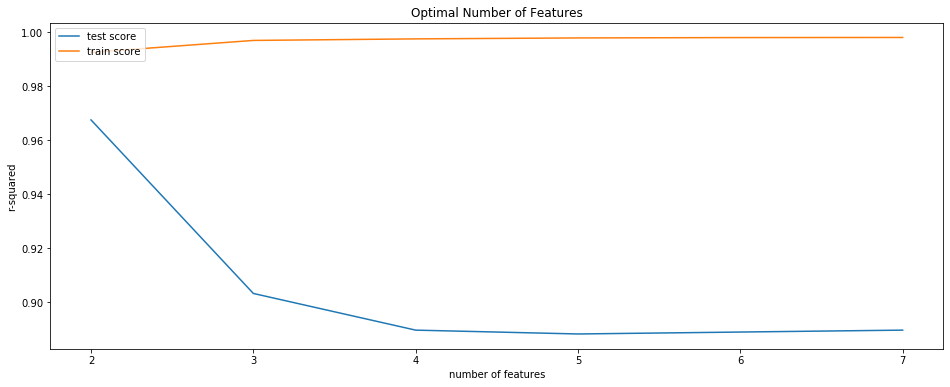

In [21]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [22]:
import sklearn
# final model
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict emission of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9657458038193736


In [23]:
#comparison with predicted values
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
56,1617.000000,1632.477112
40,867.000000,833.370343
20,169.979975,159.022640
55,1664.000000,1560.636591
32,424.800000,456.175573
63,41.720000,42.031798
39,784.000000,775.772572
33,480.000000,516.985197
26,219.019710,223.988753
61,38.060000,40.098262


In [24]:
from sklearn import ensemble
#using xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()

#using gradient boost
gba=ensemble.GradientBoostingRegressor()

#using random forest
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [25]:
xgb.fit(X_train, y_train)

rfe = RFE(xgb, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict emission of X_test
y_pred1 = xgb.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred1)
print(r2)

0.9624541255030481


In [26]:
gba.fit(X_train, y_train)

rfe = RFE(gba, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict emission of X_test
y_pred2 = gba.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred2)
print(r2)

0.9634980154366862


In [27]:
RFR.fit(X_train, y_train)

rfe = RFE(RFR, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict emission of X_test
y_pred3 = RFR.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred3)
print(r2)

0.9649982952383975


In [28]:
#comparison with predicted values
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred3})
df

,Actual,Predicted
56,1617.000000,1697.870000
40,867.000000,882.706617
20,169.979975,167.856503
55,1664.000000,1617.880000
32,424.800000,470.386599
63,41.720000,42.226346
39,784.000000,748.686834
33,480.000000,506.776211
26,219.019710,222.480629
61,38.060000,39.747570


C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Mariam Folasewa\Anaconda3\lib\site-packages\matplotlib\

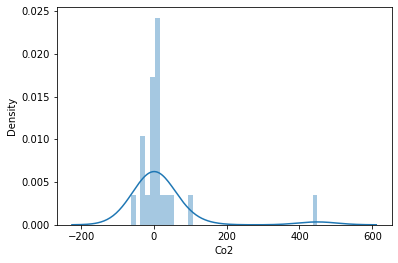

In [29]:
difference = y_test-y_pred
sns.distplot(difference)

In [30]:
import pickle
pickle.dump(lm, open('./model_linear.sav', 'wb'))
pickle.dump(xgb, open('./model_xgb.sav', 'wb'))
pickle.dump(gba, open('./model_gba.sav', 'wb'))
pickle.dump(RFR, open('./model_rfr.sav', 'wb'))
